# Hypothesis Testing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.preprocessing import StandardScaler,  MinMaxScaler
import plotly.express as px


ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
csv_file = "earthquake_count_usgs.csv"
earthquake_count_usgs = pd.read_csv(csv_file, sep = ',', lineterminator='\n', index_col=0)
csv_file0 = "max_mag_usgs.csv"
max_mag_usgs = pd.read_csv(csv_file0, sep = ',', lineterminator='\n', index_col= 0)

In [ ]:
earthquake_count = pd.DataFrame(earthquake_count_usgs)
max_mag= pd.DataFrame(max_mag_usgs)
earthquake_count.head()

,mag\r
time,
1960-01,12
1960-02,8
1960-03,6
1960-04,9
1960-05,6


explain what scaled data is

In [ ]:
x_vals = np.array(max_mag["USGS\r"]).reshape(-1,1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x_vals)

[[ 0.43392479]
 [-1.35303349]
 [-1.5302525 ]
 [-0.68846223]
 [-1.04290024]
 [ 0.30101054]
 [-0.39309722]
 [-0.58508448]
 [-1.04290024]
 [-1.8846905 ]
 [-1.33826524]
 [-1.04290024]
 [ 0.50776604]
 [ 0.8769723 ]
 [-0.58508448]
 [ 1.73353082]
 [-0.67369398]
 [-1.95853175]
 [-0.09773222]
 [-0.02389097]
 [ 0.06471854]
 [ 0.62591205]
 [ 0.38962004]
 [-0.86568123]
 [-0.96905898]
 [-0.40786547]
 [-0.30448772]
 [ 0.5816073 ]
 [ 0.5816073 ]
 [-0.21587822]
 [-0.34879247]
 [-0.83614473]
 [ 0.36008354]
 [ 0.38962004]
 [-0.55554798]
 [-0.39309722]
 [-0.62938923]
 [-0.83614473]
 [ 0.16809629]
 [-0.92475423]
 [-0.03865922]
 [-0.80660823]
 [-0.09773222]
 [-0.82137648]
 [ 1.02465481]
 [ 0.18286454]
 [-0.70323048]
 [-0.09773222]
 [ 0.24193754]
 [-0.00912272]
 [-0.30448772]
 [ 0.10902329]
 [-0.45217022]
 [-0.92475423]
 [-0.70323048]
 [-0.58508448]
 [-0.43740197]
 [ 0.43392479]
 [ 0.7292898 ]
 [-0.18634172]
 [-0.36356072]
 [-0.77707173]
 [ 0.09425504]
 [-0.14203697]
 [-0.43740197]
 [-0.33402422]
 [ 0.33054

explain what scaled_data0 is

In [ ]:
x_vals0 = np.array(earthquake_count["mag\r"]).reshape(-1,1)
scaled_data0 = scaler.fit_transform(x_vals0)

[[-3.71188458e-01]
 [-4.30328284e-01]
 [-4.59898197e-01]
 [-4.15543327e-01]
 [-4.59898197e-01]
 [-4.89468110e-01]
 [-5.04253066e-01]
 [-3.71188458e-01]
 [-4.74683153e-01]
 [-3.71188458e-01]
 [-3.85973414e-01]
 [-4.15543327e-01]
 [-3.41618545e-01]
 [-4.00758371e-01]
 [-4.15543327e-01]
 [-4.15543327e-01]
 [-3.85973414e-01]
 [-5.04253066e-01]
 [-4.15543327e-01]
 [-3.12048632e-01]
 [-1.05059241e-01]
 [-9.02742846e-02]
 [-3.71188458e-01]
 [-4.30328284e-01]
 [-4.45113240e-01]
 [-2.67693762e-01]
 [-2.23338893e-01]
 [-2.52908806e-01]
 [-2.97263675e-01]
 [-3.41618545e-01]
 [-3.85973414e-01]
 [-3.56403501e-01]
 [-2.82478719e-01]
 [-2.08553936e-01]
 [-2.82478719e-01]
 [-1.64199067e-01]
 [-3.85973414e-01]
 [-4.30328284e-01]
 [-3.26833588e-01]
 [-3.56403501e-01]
 [-3.11344586e-02]
 [-3.41618545e-01]
 [-1.93768980e-01]
 [-3.41618545e-01]
 [-2.82478719e-01]
 [-1.49414111e-01]
 [-3.26833588e-01]
 [-3.85973414e-01]
 [-3.26833588e-01]
 [-2.52908806e-01]
 [-3.56403501e-01]
 [-4.15543327e-01]
 [-4.0075837

In [ ]:
merged_earthquake_data = max_mag.copy()
merged_earthquake_data.drop(columns=["USGS\r"], inplace=True)
merged_earthquake_data["scaled_earthquake_count"] = scaled_data0
merged_earthquake_data["scaled_max_mag"] = scaled_data
merged_earthquake_data.head()

,Date,scaled_earthquake_count,scaled_max_mag
0,1960-01,-0.371188,0.433925
1,1960-02,-0.430328,-1.353033
2,1960-03,-0.459898,-1.530252
3,1960-04,-0.415543,-0.688462
4,1960-05,-0.459898,-1.042900


In [ ]:
merged_earthquake_data['Date'] = pd.to_datetime(merged_earthquake_data['Date'])

# Create a Plotly figure
fig = px.line(merged_earthquake_data, x='Date', y=['scaled_earthquake_count', 'scaled_max_mag'], labels={'value': 'Value'}, title='scaled_earthquake_count vs scaled_max_mag')
fig.update_layout(
    width=1200,
    height=600,
)

fig.update_traces(line=dict(width=1.0))
# Add interactivity
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(dragmode='pan', hovermode='x')

# Show the interactive plot
fig.show()

Now we find the 10 largest values of both dataframes

In [ ]:
scaled_earthquake_count = merged_earthquake_data.copy()
scaled_earthquake_count = scaled_earthquake_count.nlargest(15, 'scaled_earthquake_count')
scaled_earthquake_count.head(15)

,Date,scaled_earthquake_count,scaled_max_mag
714,2019-07-01,15.315650,3.535257
603,2010-04-01,9.327743,3.682940
390,1992-07-01,7.642258,1.423398
389,1992-06-01,7.287419,3.830622
477,1999-10-01,6.562956,3.535257
244,1980-05-01,6.533386,2.206115
318,1986-07-01,6.089838,2.501480
408,1994-01-01,4.907041,2.944527
280,1983-05-01,4.345213,2.944527
724,2020-05-01,4.286073,2.649162


Text(0, 0.5, 'Normalized Earthquake Magnitudes (Top 15)')

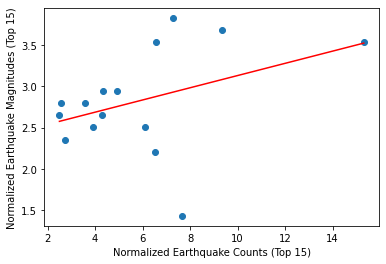

In [ ]:
plt.scatter(scaled_earthquake_count['scaled_earthquake_count'], scaled_earthquake_count['scaled_max_mag'])
slope, intercept = np.polyfit(scaled_earthquake_count['scaled_earthquake_count'], scaled_earthquake_count['scaled_max_mag'], 1)  # 1 specifies a linear fit

# Create the best-fit line equation
best_fit_line = slope * np.array(scaled_earthquake_count['scaled_earthquake_count']) + intercept

# Plot the best-fit line
plt.plot(scaled_earthquake_count['scaled_earthquake_count'], best_fit_line, color='red', label='Line of Best Fit')
plt.xlabel('Normalized Earthquake Counts (Top 15)')
plt.ylabel('Normalized Earthquake Magnitudes (Top 15)')

In [ ]:
scaled_max_mag = merged_earthquake_data.copy()
scaled_max_mag = scaled_max_mag.nlargest(15, 'scaled_max_mag')
scaled_max_mag.head(15)

,Date,scaled_earthquake_count,scaled_max_mag
389,1992-06-01,7.287419,3.830622
603,2010-04-01,9.327743,3.682940
477,1999-10-01,6.562956,3.535257
714,2019-07-01,15.315650,3.535257
357,1989-10-01,2.423168,3.239892
280,1983-05-01,4.345213,2.944527
408,1994-01-01,4.907041,2.944527
99,1968-04-01,1.151662,2.796845
133,1971-02-01,3.561610,2.796845
334,1987-11-01,2.571018,2.796845


In [ ]:
earthquake_count_dates = np.array(scaled_earthquake_count["Date"])
max_mag_dates = np.array(scaled_max_mag["Date"])

['2019-07-01T00:00:00.000000000' '2010-04-01T00:00:00.000000000'
 '1992-07-01T00:00:00.000000000' '1992-06-01T00:00:00.000000000'
 '1999-10-01T00:00:00.000000000' '1980-05-01T00:00:00.000000000'
 '1986-07-01T00:00:00.000000000' '1994-01-01T00:00:00.000000000'
 '1983-05-01T00:00:00.000000000' '2020-05-01T00:00:00.000000000'
 '1979-10-01T00:00:00.000000000' '1971-02-01T00:00:00.000000000'
 '1980-06-01T00:00:00.000000000' '1987-11-01T00:00:00.000000000'
 '2003-12-01T00:00:00.000000000']
['1992-06-01T00:00:00.000000000' '2010-04-01T00:00:00.000000000'
 '1999-10-01T00:00:00.000000000' '2019-07-01T00:00:00.000000000'
 '1989-10-01T00:00:00.000000000' '1983-05-01T00:00:00.000000000'
 '1994-01-01T00:00:00.000000000' '1968-04-01T00:00:00.000000000'
 '1971-02-01T00:00:00.000000000' '1987-11-01T00:00:00.000000000'
 '2003-12-01T00:00:00.000000000' '2020-05-01T00:00:00.000000000'
 '1975-10-01T00:00:00.000000000' '1979-10-01T00:00:00.000000000'
 '1986-07-01T00:00:00.000000000']


In [ ]:
def jaccard_similarity(a, b):
    intersection = len(set(a).intersection(b))
    union = len(set(a).union(b))
    similarity = intersection / union
    percent_similarity = similarity * 100
    return percent_similarity

print(jaccard_similarity(earthquake_count_dates, max_mag_dates))

66.66666666666666


explain what 2/3rds jaccard similarity means